In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-scores/student_scores.csv


In [2]:
data = pd.read_csv('../input/student-scores/student_scores.csv')

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


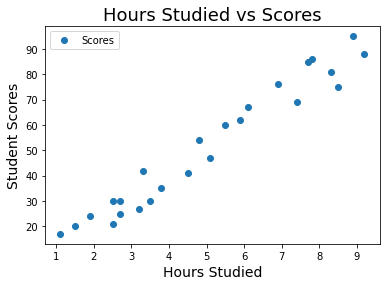

In [4]:
data.plot(x='Hours', y='Scores', style='o')

plt.title('Hours Studied vs Scores', fontsize = 18)
plt.xlabel('Hours Studied', fontsize = 14)
plt.ylabel('Student Scores',fontsize = 14)
plt.show()

In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [7]:
regr =LinearRegression()
regr.fit(X_train, y_train)

print('Training complete.')

Training complete.


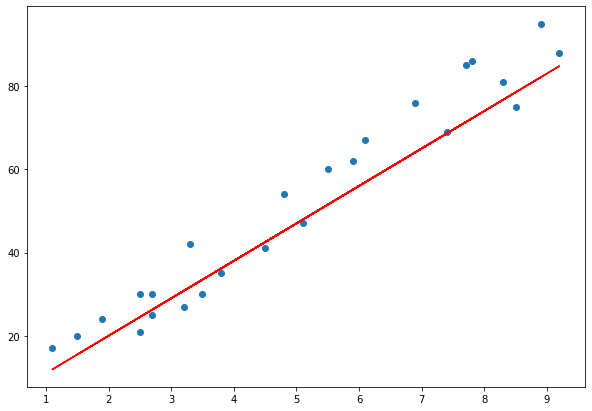

In [8]:
line = int(regr.coef_)*X+int(regr.intercept_)
plt.figure(figsize=(10,7))
plt.scatter(X, y)
plt.plot(X, line, color='red')
plt.show()

In [9]:
print(X_test)
y_pred = regr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
hours = np.array([9.25]).reshape(1, -1)

pred = regr.predict(hours)
print('No of Hours = {}'.format(hours[0,0]))
print('Predicted Score = {}'.format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating the Model

In [12]:
from sklearn import metrics 
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
